# AWS Hackathon - Machine Failure Prediction





## 1) Data Ingest and Explore 



In [40]:
# Step 1: Ingest & Explore
import pandas as pd
path = "AWS_hackathon.csv"
df = pd.read_csv(path)
df.head(10)

print("Rows, Columns:", df.shape)

print("\nColumns:\n", df.columns.tolist())

print("\nMissing values per column:\n", df.isnull().sum())

print("\nTarget distribution (Machine failure):\n", df['Machine failure'].value_counts())

print("\nFirst 5 rows:")
display(df.head())

Rows, Columns: (10000, 14)

Columns:
 ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

Missing values per column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Target distribution (Machine failure):
 Machine failure
0    9661
1     339
Name: count, dtype: int64

First 5 rows:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## 2) Load dataset (Alag function)

Yahan ek function hai jo dataset load karke return karta hai.

In [41]:
# Step 2: Load dataset (function)
import pandas as pd

def load_data(path="AWS_hackathon.csv"):
    df = pd.read_csv(path)
    return df

# Example usage
df = load_data()
print("Loaded:", df.shape)

Loaded: (10000, 14)


## 3) Basic EDA  Patterns

Features aur failures ke darmiyan simple patterns dekho. Histograms aur correlations.

Mean by Machine failure:
                 Air temperature [K]  Process temperature [K]  \
Machine failure                                                 
0                            299.974                  309.996   
1                            300.886                  310.290   

                 Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Machine failure                                                        
0                              1540.260       39.630          106.694  
1                              1496.487       50.168          143.782  

Correlations with target:
Machine failure            1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64


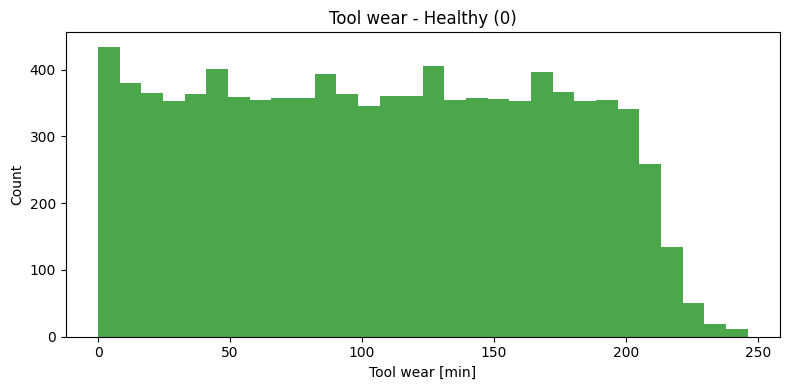

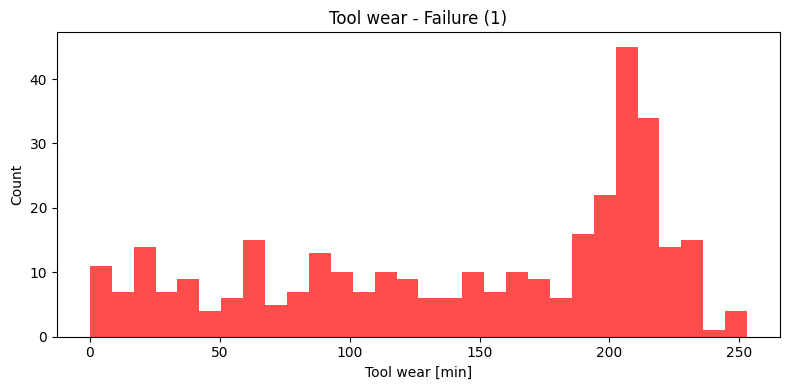

Histograms saved: tool_wear_healthy.png, tool_wear_failure.png


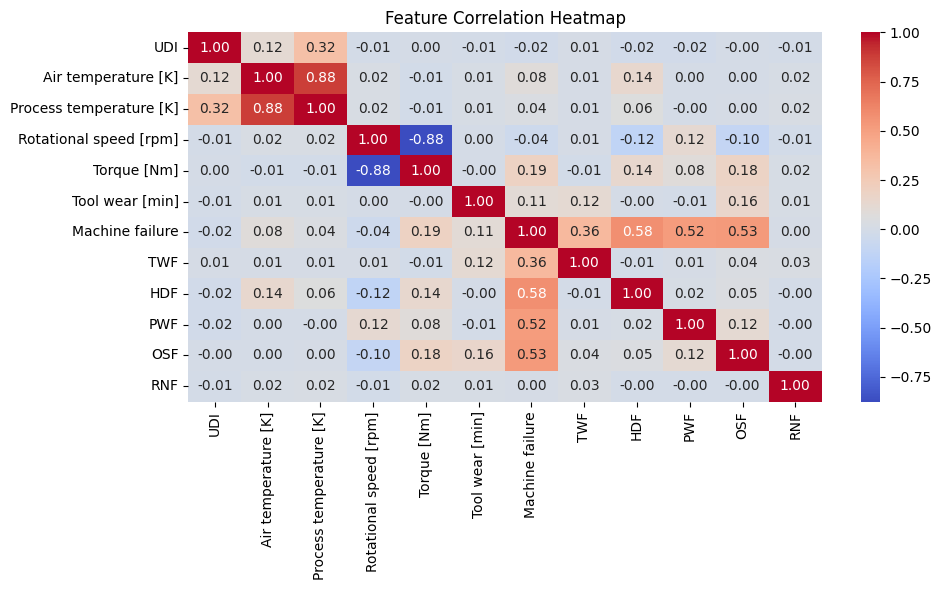

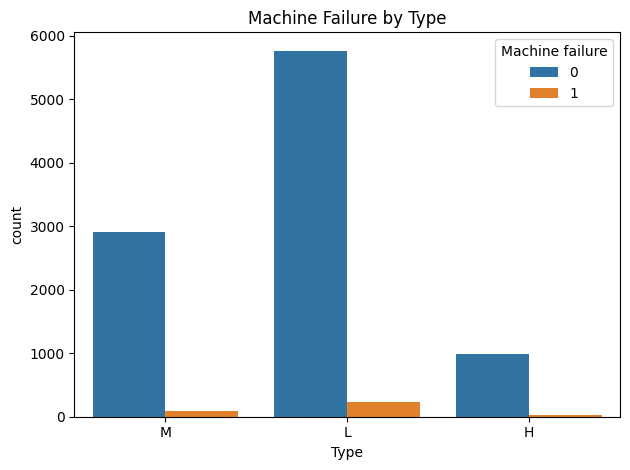

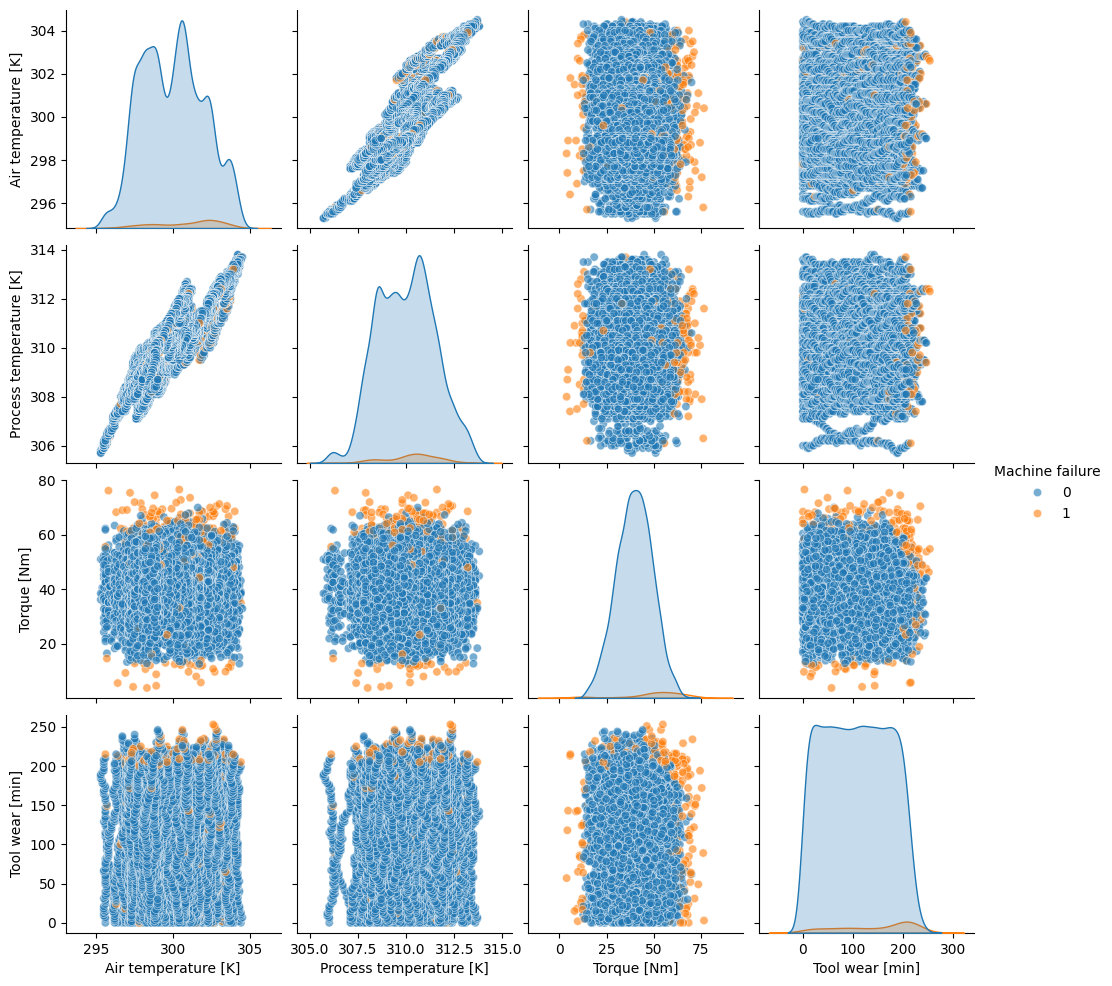

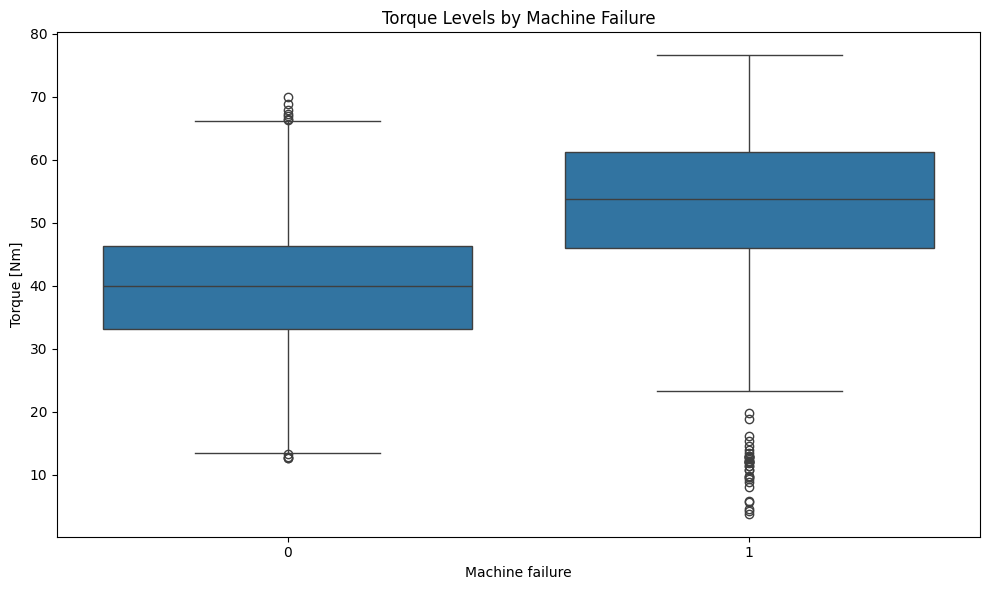

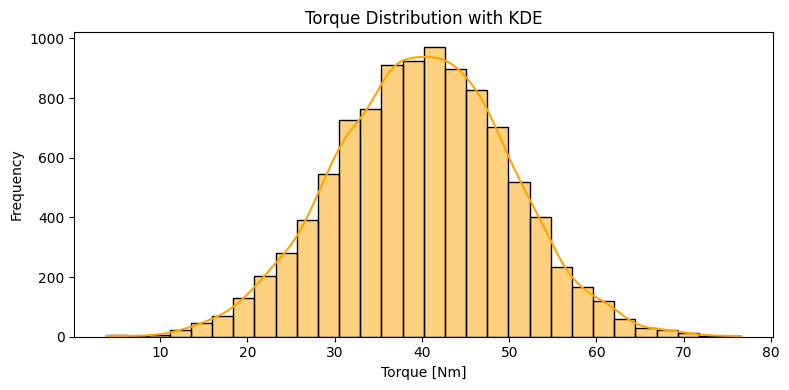


Statistical Summary:
        Torque [Nm]  Tool wear [min]  Rotational speed [rpm]
count  10000.000000     10000.000000            10000.000000
mean      39.986910       107.951000             1538.776100
std        9.968934        63.654147              179.284096
min        3.800000         0.000000             1168.000000
25%       33.200000        53.000000             1423.000000
50%       40.100000       108.000000             1503.000000
75%       46.800000       162.000000             1612.000000
max       76.600000       253.000000             2886.000000


In [42]:
# Step 3: Enhanced EDA (Exploratory Data Analysis)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =============================
# 1. Mean by Machine failure
# =============================
numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                'Torque [Nm]', 'Tool wear [min]']

print("Mean by Machine failure:")
print(df.groupby('Machine failure')[numeric_cols].mean().round(3))


# 2. Correlation with Target
print("\nCorrelations with target:")
print(df[numeric_cols + ['Machine failure']].corr()['Machine failure'].sort_values(ascending=False))


# 3. Histograms for Tool 
plt.figure(figsize=(8,4))
plt.hist(df[df['Machine failure']==0]['Tool wear [min]'], bins=30, color='green', alpha=0.7)
plt.title("Tool wear - Healthy (0)")
plt.xlabel("Tool wear [min]"); 
plt.ylabel("Count")
plt.tight_layout(); 
plt.savefig("tool_wear_healthy.png"); 
plt.show()

plt.figure(figsize=(8,4))
plt.hist(df[df['Machine failure']==1]['Tool wear [min]'], bins=30, color='red', alpha=0.7)
plt.title("Tool wear - Failure (1)")
plt.xlabel("Tool wear [min]"); 
plt.ylabel("Count")
plt.tight_layout();
plt.savefig("tool_wear_failure.png"); 
plt.show()

print("Histograms saved: tool_wear_healthy.png, tool_wear_failure.png")

# 4. Correlation Heatmap
plt.figure(figsize=(10,6))

# sirf numeric columns select kro (string columns hata do)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

# Roman Urdu:
# Ye heatmap sab features ke relation dikhata hai.
# Jahan value 1 ke qareeb ho, wahan strong relation hota hai.

sns.countplot(x='Type', hue='Machine failure', data=df)
plt.title("Machine Failure by Type")
plt.tight_layout()
plt.savefig("failure_by_type.png")
plt.show()


# 5. Pairplot for Relationships

sns.pairplot(df, vars=['Air temperature [K]', 'Process temperature [K]', 
                       'Torque [Nm]', 'Tool wear [min]'],
             hue='Machine failure', diag_kind='kde', plot_kws={'alpha':0.6})
plt.savefig("pairplot_features.png")
plt.show()


# 6. Boxplot (Check Data Spread & Outliers)
plt.figure(figsize=(10,6))
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=df)
plt.title("Torque Levels by Machine Failure")
plt.tight_layout()
plt.savefig("boxplot_torque_failure.png")
plt.show()


# 7. Distribution & Summary
plt.figure(figsize=(8,4))
sns.histplot(df['Torque [Nm]'], bins=30, kde=True, color='orange')
plt.title("Torque Distribution with KDE")
plt.xlabel("Torque [Nm]")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("torque_distribution.png")
plt.show()

print("\nStatistical Summary:")
print(df[['Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]']].describe())



## 4) Feature Engineering 

Simple features: temp_diff, torque_per_speed, wear_per_speed. UDI aur Product ID drop kar do.

In [43]:
# Step 4: Feature Engineering
import numpy as np

def feature_engineer(df):
    df = df.copy()
    df['temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
    df['torque_per_speed'] = df['Torque [Nm]'] / (df['Rotational speed [rpm]'] + 1e-6)
    df['wear_per_speed'] = df['Tool wear [min]'] / (df['Rotational speed [rpm]'] + 1e-6)
    df = df.drop(columns=['UDI', 'Product ID'])
    return df

df_fe = feature_engineer(df)
print("Feature engineered shape:", df_fe.shape)
display(df_fe.head())

# Save to CSV for later steps
df_fe.to_csv("aws_hackathon_feature_engineered.csv", index=False)
print("Saved aws_hackathon_feature_engineered.csv")

Feature engineered shape: (10000, 15)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temp_diff,torque_per_speed,wear_per_speed
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,0.027595,0.000000
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,0.032884,0.002131
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,0.032977,0.003338
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,0.027565,0.004885
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,0.028409,0.006392


Saved aws_hackathon_feature_engineered.csv


## 5) Model Development (Pipeline)

ColumnTransformer + StandardScaler + OneHotEncoder + RandomForest. Train-test split with stratify.

In [44]:
# Step 5: Model Development - Train
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump

df = pd.read_csv("aws_hackathon_feature_engineered.csv")

feature_cols = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                'Torque [Nm]', 'Tool wear [min]', 'temp_diff', 'torque_per_speed', 'wear_per_speed']

# X = df[feature_cols];
# y = df['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df['Machine failure'], test_size=0.2, stratify=df['Machine failure'], random_state=42)

numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                    'Torque [Nm]', 'Tool wear [min]', 'temp_diff', 'torque_per_speed', 'wear_per_speed']
categorical_features = ['Type']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

clf_pipeline = Pipeline(steps=[('preproc', preprocessor),
                               ('model', RandomForestClassifier(n_estimators=300, max_depth=20, class_weight='balanced', random_state=42, n_jobs=-1))])




print("Training... ")
clf_pipeline.fit(X_train, y_train)
print("Training done. Saving model...")
dump(clf_pipeline, "rf_failure_model.joblib")
print("Saved rf_failure_model.joblib")

# Quick evaluation
y_pred = clf_pipeline.predict(X_test)
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

Training... 
Training done. Saving model...
Saved rf_failure_model.joblib

Classification report:
              precision    recall  f1-score   support

           0     0.9882    0.9984    0.9933      1932
           1     0.9375    0.6618    0.7759        68

    accuracy                         0.9870      2000
   macro avg     0.9629    0.8301    0.8846      2000
weighted avg     0.9865    0.9870    0.9859      2000


Confusion matrix:
[[1929    3]
 [  23   45]]


## 6) Evaluation (Accuracy, Precision, Recall, F1)

Alag cell mai detailed metrics aur ROC-AUC.

In [45]:
# Step 6: Evaluation - Detailed metrics
import pandas as pd
from joblib import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv("aws_hackathon_feature_engineered.csv")
feature_cols = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                'Torque [Nm]', 'Tool wear [min]', 'temp_diff', 'torque_per_speed', 'wear_per_speed']
X = df[feature_cols]; y = df['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model = load("rf_failure_model.joblib")

y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.4).astype(int)  


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rocauc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {rocauc:.4f}")

Accuracy: 0.9875
Precision: 0.8772
Recall: 0.7353
F1-score: 0.8000
ROC-AUC: 0.9714


## 7) Streaming Simulation (Row by row)

Simulate real-time by ek-ek row feed karna, predictions log aur alerts create karna.

In [46]:
# Step 7: Streaming simulation (row by row)
import pandas as pd
from joblib import load
import csv, os, time

model = load("rf_failure_model.joblib")
df = pd.read_csv("aws_hackathon_feature_engineered.csv")
feature_cols = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                'Torque [Nm]', 'Tool wear [min]', 'temp_diff', 'torque_per_speed', 'wear_per_speed']

log_csv = "predictions_log.csv"
if not os.path.exists(log_csv):
    with open(log_csv, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["index","timestamp","pred","prob_failure","air_temp","proc_temp","rot_speed","torque","tool_wear"])

alerts_log = "alerts.log"

# small simulation loop (limit rows for demo)
for i, (_, row) in enumerate(df.sample(frac=1, random_state=42).iterrows()):
    if i >= 1000:  # demo limit, change or remove for full stream
        break
    X_row = row[feature_cols].to_frame().T
    proba = model.predict_proba(X_row)[:,1][0]
    pred = int(proba >= 0.5)
    timestamp = pd.Timestamp.now().isoformat()

    with open(log_csv, "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerow([i, timestamp, pred, float(proba),
                         row['Air temperature [K]'], row['Process temperature [K]'],
                         row['Rotational speed [rpm]'], row['Torque [Nm]'], row['Tool wear [min]']])

    if pred == 1:
        alert = f"{timestamp} ALERT - idx {i} predicted FAILURE with prob {proba:.3f}\n"
        with open(alerts_log, "a") as fa:
            fa.write(alert)
        print(alert.strip())

    time.sleep(0.01)

print("Streaming demo done. Check predictions_log.csv and alerts.log")

2025-10-20T13:50:59.155959 ALERT - idx 1 predicted FAILURE with prob 0.590
2025-10-20T13:50:59.804902 ALERT - idx 5 predicted FAILURE with prob 0.736
2025-10-20T13:51:12.170868 ALERT - idx 95 predicted FAILURE with prob 0.947
2025-10-20T13:51:15.128210 ALERT - idx 113 predicted FAILURE with prob 0.700
2025-10-20T13:51:16.133575 ALERT - idx 119 predicted FAILURE with prob 0.843
2025-10-20T13:51:16.874853 ALERT - idx 124 predicted FAILURE with prob 0.780
2025-10-20T13:51:17.394644 ALERT - idx 127 predicted FAILURE with prob 0.893
2025-10-20T13:51:20.973549 ALERT - idx 156 predicted FAILURE with prob 0.680
2025-10-20T13:51:27.653400 ALERT - idx 201 predicted FAILURE with prob 0.583
2025-10-20T13:51:27.731414 ALERT - idx 202 predicted FAILURE with prob 0.873
2025-10-20T13:51:33.992888 ALERT - idx 245 predicted FAILURE with prob 0.616
2025-10-20T13:51:39.987008 ALERT - idx 287 predicted FAILURE with prob 0.880
2025-10-20T13:51:46.380917 ALERT - idx 326 predicted FAILURE with prob 0.720
2025

## 8) Logging aur Alerts (Simple)

Predictions `predictions_log.csv` mai hain. Agar `pred==1` to `alerts.log` mai likha jata hai. Production mai webhook/SNS use karo.

## 9) Visualization - Streamlit reference (Notebook mai plots bhi hain)

Simple inline plot aur instructions to run Streamlit app saved separately.

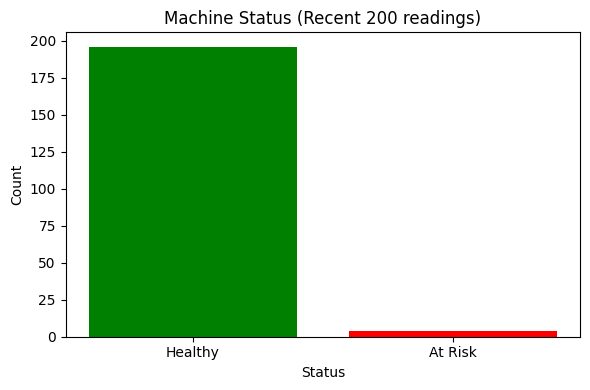

Saved machine_status_bar.png — showing Healthy vs At Risk counts


In [47]:
# Track Machine Status (Healthy / At Risk)
import pandas as pd
import matplotlib.pyplot as plt

# Read logged predictions
logs = pd.read_csv("predictions_log.csv")



# Convert predictions to labels
logs['Status'] = logs['pred'].apply(lambda x: 'At Risk' if x == 1 else 'Healthy')

# Count of each status (latest 200 entries)
recent = logs.tail(200)
status_counts = recent['Status'].value_counts()

# Simple bar chart of machine status
plt.figure(figsize=(6,4))
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
plt.title("Machine Status (Recent 200 readings)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("machine_status_bar.png")
plt.show()
plt.close()

print("Saved machine_status_bar.png — showing Healthy vs At Risk counts")
